#  Finding Heavy Traffic Indicators on I-94

The goal of this analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.  For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

John Hogue made the dataset available, and can be downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mitv = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
print(mitv.head(5))
print(mitv.tail(5))
mitv.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

### Traffic volume distribution

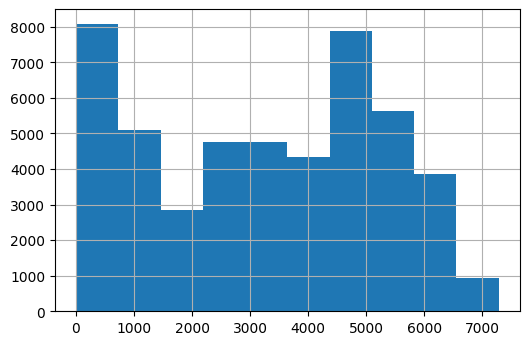

In [4]:
mitv["traffic_volume"].hist()

In [5]:
mitv.describe()["traffic_volume"]

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

### Analyzing daytime vs nighttime traffic

In [6]:
mitv["date_time"]=pd.to_datetime(mitv["date_time"])
mitv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


#### Isolating daytime and nighttime data

In [7]:
mitv_day = mitv.copy()[(mitv["date_time"].dt.hour >= 7) & (mitv["date_time"].dt.hour < 19)]
print(mitv_day.shape)
mitv_night = mitv.copy()[(mitv["date_time"].dt.hour >= 19) | (mitv["date_time"].dt.hour < 7)]
print(mitv_night.shape)

(23877, 9)
(24327, 9)


#### Histograms for day and night traffic volume

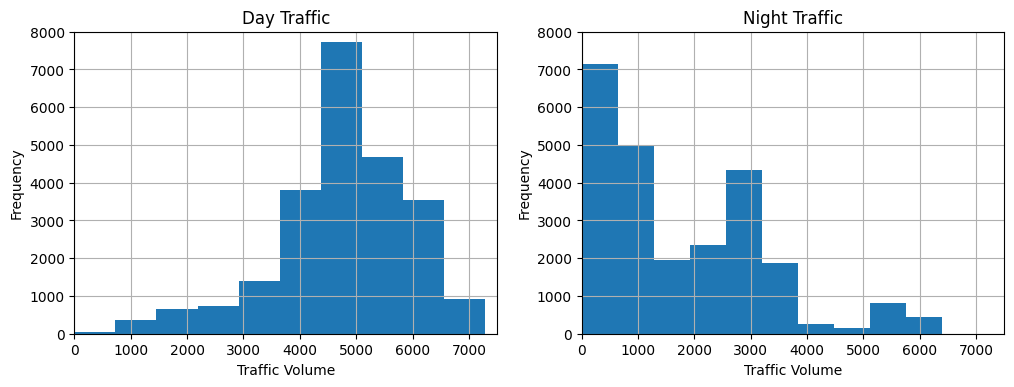

In [8]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
mitv_day["traffic_volume"].hist()
plt.title("Day Traffic")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim([0, 7500])
plt.ylim([0, 8000])


plt.subplot(1,2,2)
mitv_night["traffic_volume"].hist()
plt.title("Night Traffic")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim([0, 7500])
plt.ylim([0, 8000])

plt.show()

In [9]:
print(mitv_day.describe()["traffic_volume"])
print(mitv_night.describe()["traffic_volume"])

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


The first graphic indicates that the traffic volume tends to be high, 75% of the time at least 4252 cars passed each hour on that station.

In opossite, the second graph indicates that 75% of the times, less or equal to 2819 cars passed on that specific station.


#### Time indicators (Monthly)

In [12]:
mitv['month'] = mitv['date_time'].dt.month
mitv_by_month = mitv.groupby('month').mean()
mitv_by_month['traffic_volume']

month
1     3051.081378
2     3197.945547
3     3308.388611
4     3304.372388
5     3366.319432
6     3419.077413
7     3205.481752
8     3394.241891
9     3303.049334
10    3390.678376
11    3167.592784
12    3024.257943
Name: traffic_volume, dtype: float64

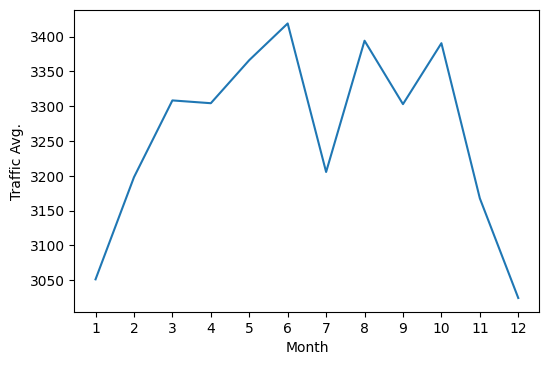

In [22]:
import numpy as np
mitv_by_month['traffic_volume'].plot()
plt.xticks(np.arange(1,13, step=1))
plt.xlabel('Month')
plt.ylabel('Traffic Avg.')
plt.show()

By observing the monthly averages we can infer that January and December are lower traffic months. Also, there is a traffic decrease on July, just after the month with higher traffic, June.

#### Time indicators (by day)

In [23]:
mitv['dayofweek'] = mitv['date_time'].dt.dayofweek
mitv_by_dayofweek = mitv.groupby('dayofweek').mean()
mitv_by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    3309.387161
1    3488.555799
2    3583.196681
3    3637.899663
4    3656.358836
5    2773.638120
6    2368.588329
Name: traffic_volume, dtype: float64

([<matplotlib.axis.XTick at 0x7f88ef8ac3a0>,
 [Text(0, 0, 'Mon'),
  Text(0, 0, 'Tue'),
  Text(0, 0, 'Wed'),
  Text(0, 0, 'Thu'),
  Text(0, 0, 'Fri'),
  Text(0, 0, 'Sat'),
  Text(0, 0, 'Sun')])

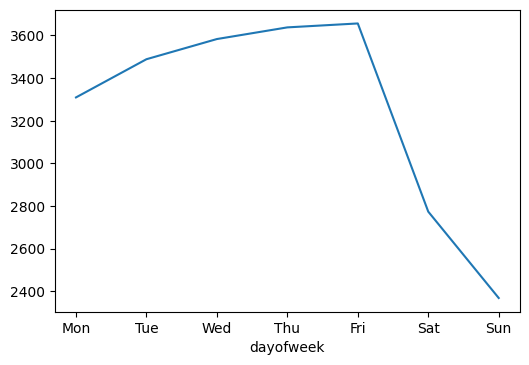

In [30]:
mitv_by_dayofweek['traffic_volume'].plot()
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

From the previous I can infere that weekend days are the days with less traffic, being Sunday the day with less traffic from the whole week.
Also, the traffic during the week increases gradually, being Friday the day with most traffic.

#### Time indicators (by hour)

In [32]:
mitv['hour'] = mitv['date_time'].dt.hour
bussiness_days = mitv.copy()[mitv['dayofweek'] <= 4] # 4 == Friday
weekend = mitv.copy()[mitv['dayofweek'] >= 5] # 5 == Saturday
mitv_by_hour_business = bussiness_days.groupby('hour').mean()
mitv_by_hour_weekend = weekend.groupby('hour').mean()

print(mitv_by_hour_business['traffic_volume'])
print(mitv_by_hour_weekend['traffic_volume'])

hour
0      651.528971
1      396.913043
2      301.982818
3      362.289835
4      832.661096
5     2701.296703
6     5365.983210
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
20    2842.433004
21    2673.042807
22    2125.913104
23    1379.549728
Name: traffic_volume, dtype: float64
hour
0     1306.414035
1      805.128333
2      611.171986
3      393.611599
4      375.420168
5      639.237232
6     1089.100334
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
20    2815.039216
21    2658.445242
22    2384.368607
23    1699.050699
Name: traffic_volume, dtype: float64


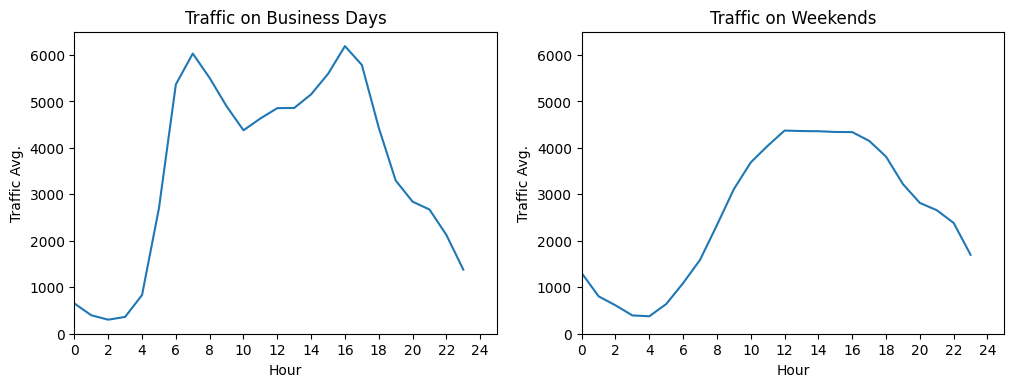

In [41]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
mitv_by_hour_business['traffic_volume'].plot()
plt.title('Traffic on Business Days')
plt.xlabel('Hour')
plt.ylabel('Traffic Avg.')
plt.xlim([0, 25])
plt.ylim([0, 6500])
plt.xticks(np.arange(0,25, step=2))

plt.subplot(1,2,2)
mitv_by_hour_weekend['traffic_volume'].plot()
plt.title('Traffic on Weekends')
plt.xlabel('Hour')
plt.ylabel('Traffic Avg.')
plt.xlim([0, 25])
plt.ylim([0, 6500])
plt.xticks(np.arange(0,25, step=2))

plt.show()

Rush hours during business days:
7:00 am and 16:00 are the hours with the heaviest traffic hours on business days.

Rush hours during weekends:
There are no rush hours, however the hours with more traffic during weekends occur from 12:00 to 17:00

#### Weather Indicators

In [42]:
mitv.corr()["traffic_volume"]

temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
traffic_volume    1.000000
month            -0.002533
dayofweek        -0.149544
hour              0.352401
Name: traffic_volume, dtype: float64

from the previous, the column with the strongest correlation with traffic_volume is temperature. 

(240.0, 310.0)

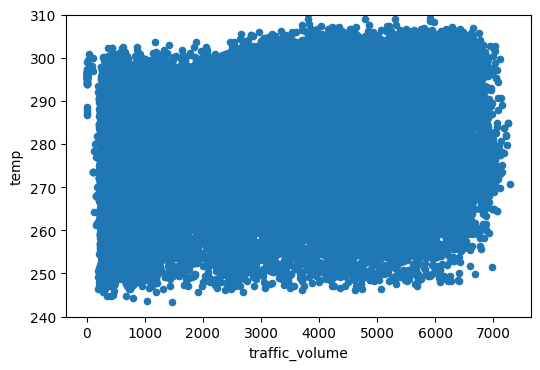

In [50]:
mitv.plot.scatter(x="traffic_volume",y="temp")
plt.ylim(240,310)

from the previous we can infer that the temperature is not a reliable indicator for heavy traffic on that particular station and direction.

#### Weather Types

In [53]:
by_weather_main = mitv.groupby('weather_main').mean()
by_weather_description = mitv.groupby('weather_description').mean()

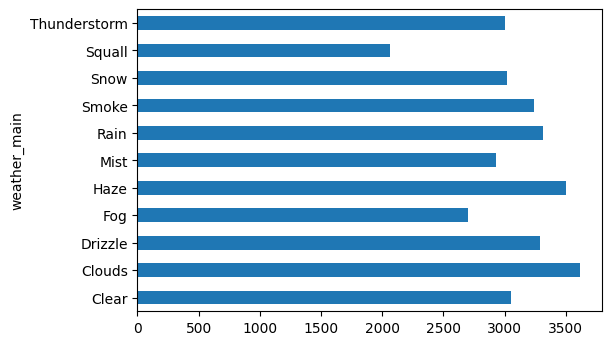

In [56]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

Cloudy days seems to be the larger traffic volume days, however, none of those exceeds 5,000 cars. It doesn't seems to be an indicator of large traffic.

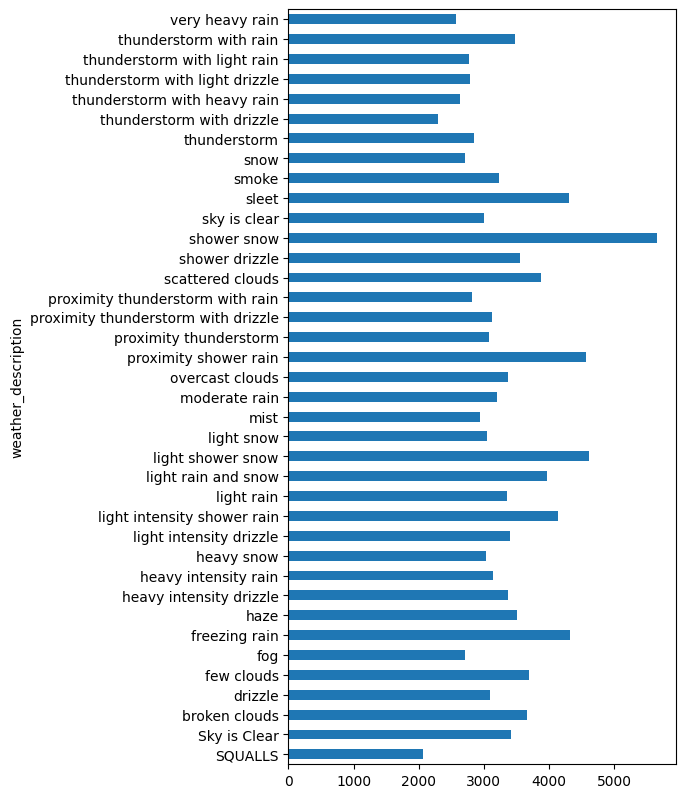

In [61]:
plt.figure(figsize=(5,10))
by_weather_description['traffic_volume'].plot.barh()

Shower snow seems to be the weather description that is linked to more traffic (> 5000 cars). 